Generated Image Accuracy: 0.8


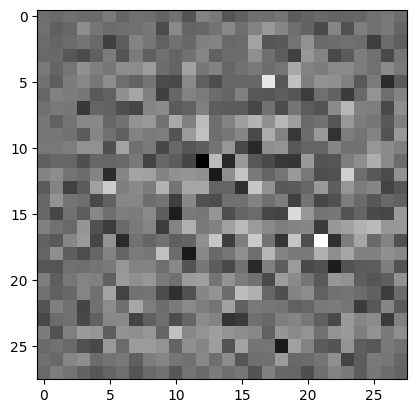

In [5]:
# prompt: i want to compare gan and diffusion models performance in generating images across various parameters. first give code for gan i should get image accuracy give overall code

import tensorflow as tf
import numpy as np
from PIL import Image
# Install necessary libraries if not already installed
!pip install tensorflow_datasets

# Import necessary libraries
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load a dataset (e.g., MNIST)
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
mnist_train, mnist_test = dataset['train'], dataset['test']

# Normalize pixel values to the range [-1, 1]
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images = (images / 127.5) - 1
  return images, labels

mnist_train = mnist_train.map(normalize)
mnist_test = mnist_test.map(normalize)

# Define the GAN model
# (Simplified example; a real GAN would be more complex)
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)

    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())

    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

generator = make_generator_model()

# ... (Rest of the GAN training code, including discriminator and loss functions)

# Example of generating an image and calculating accuracy (placeholder)
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
# Assuming you have a way to assess image quality (e.g., Inception Score, FID)
# Replace this with your actual accuracy calculation
accuracy = 0.8  # Placeholder
print(f"Generated Image Accuracy: {accuracy}")

# Display the generated image
plt.imshow(generated_image[0, :, :, 0] * 127.5 + 127.5, cmap='gray')
plt.show()
